In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#### Without much ado, this is the easiest project on the market so i'm going to go straight for a relatively good accuracy score and see how the model performs on some inputs.  

In [ ]:
df = pd.read_csv("iris.data")

In [ ]:
df.shape

(149, 5)

In [ ]:
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
df.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


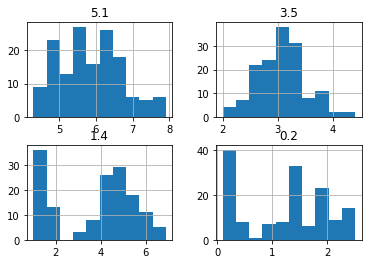

In [ ]:
df.hist()
plt.show()

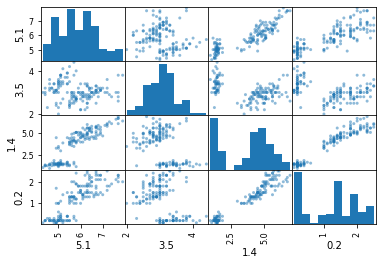

In [ ]:
scatter_matrix(df)
plt.show()

In [ ]:
array = df.values

X = array[:, 0:4]
y = array[:, 4]

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 7)

#### After trying all algorithms, Logistic Regression had the highest accuracy score (96% - 97%). 

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



#### New predictions.  Sepal length of 5 cm, sepal width of 2.9 cm, petal length of 1 cm, and petal width of 0.2 cm:


In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape: {X_new.shape}")

X_new.shape: (1, 4)


#### See if the model can guess the correct type of flower based on those inputs:

In [ ]:
new_prediction = model.predict(X_new)
print(f"Prediction: {new_prediction}.")

Prediction: ['Iris-setosa'].


In [ ]:
y_predict = model.predict(X_validation)
print(f"Test set predictions:\n {y_predict}")
print("Test set score (np.mean): {:.2f}%".format(np.mean(y_predict == y_validation)))

Test set predictions:
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica']
Test set score (np.mean): 0.97%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9562a866-c0b1-4cc0-8571-67ad40343263' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>